In [27]:
import numpy as np 
import tensorflow as tf 
import keras 
import matplotlib.pyplot as plt 

damaged
img_array:  (128, 128) uint8


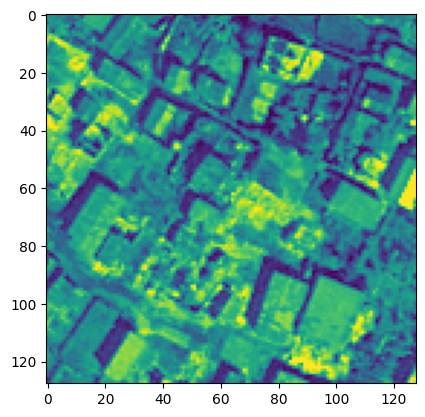

undamaged
img_array:  (128, 128) uint8


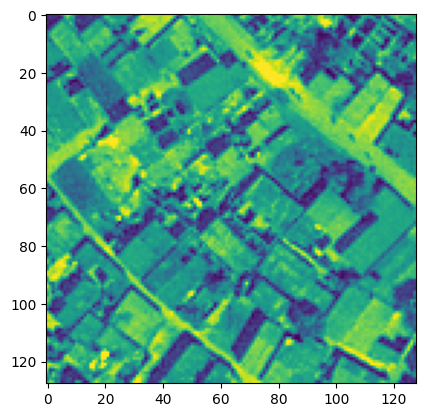

In [28]:
import os 
import cv2
categories=["damaged","undamaged"]
for category in categories:
    path=os.path.join('./samples',category)
    for image in os.listdir(path):
        print(category)
        img_array=cv2.imread(os.path.join(path,image),cv2.IMREAD_GRAYSCALE)
        print('img_array: ',img_array.shape,img_array.dtype)
        plt.imshow(img_array)
        plt.show()
        break

In [16]:
import pandas as pd
import numpy as np 
import cv2
import os 
from random import shuffle
from tqdm import tqdm 
import scipy
import skimage 
from skimage.transform import resize 
print(os.listdir("./data"))

['data']


In [21]:
print(os.listdir("./data/data/test"))

['NORMAL', 'PNEUMONIA']


In [22]:
train_dir="./data/data/train"
test_dir="./data/data/test"

In [24]:
# preprocessing

def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label=0
            elif nextdir in ['PNEUMONIA']:
                label=1
            else:
                label=2
    return nextdir,label

In [35]:
def preprocessing_data(Dir):
    x = []
    y = []

    for nextdir in os.listdir(Dir):
        label = get_label(nextdir)  # Corrected: Pass nextdir to get_label function
        temp = os.path.join(Dir, nextdir)

        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp, image_filename)
            img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
            
            if img is not None:
                img = skimage.transform.resize(img, (150, 150, 3))
                img = np.asarray(img)
                x.append(img)
                y.append(label)

    x = np.asarray(x)
    y = np.asarray(y)
    
    return x, y

def get_label(directory):
    if directory == 'NORMAL':
        return 0
    elif directory == 'PNEUMONIA':
        return 1
    else:
        return 2


In [38]:
def get_data(Dir):
    x = []
    y = []

    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
            temp = os.path.join(Dir, nextDir)  # Use os.path.join to construct the path

            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(os.path.join(temp, file))  # Use os.path.join for image path
                if img is not None:
                    img = skimage.transform.resize(img, (150, 150, 3))
                    img = np.asarray(img)
                    x.append(img)
                    y.append(label)

    x = np.asarray(x)
    y = np.asarray(y)
    return x, y



In [39]:
x_train,y_train=get_data(train_dir)

  0%|          | 0/105 [00:00<?, ?it/s]

100%|██████████| 105/105 [00:47<00:00,  2.22it/s]


In [40]:
x_test,y_test=get_data(test_dir)

100%|██████████| 30/30 [00:17<00:00,  1.74it/s]


In [41]:
print(x_train.shape)
print('**************')
print(x_test.shape)

(210, 150, 150, 3)
**************
(60, 150, 150, 3)


In [43]:
from keras.utils import to_categorical

# Assuming y_train and y_test are your label arrays
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)


In [44]:
print(y_train.shape)

(210, 2)


In [47]:
P_images_path = os.path.join(train_dir, "PNEUMONIA")
N_images_path = os.path.join(train_dir, "NORMAL")

Pimages = os.listdir(P_images_path)
Nimages = os.listdir(N_images_path)


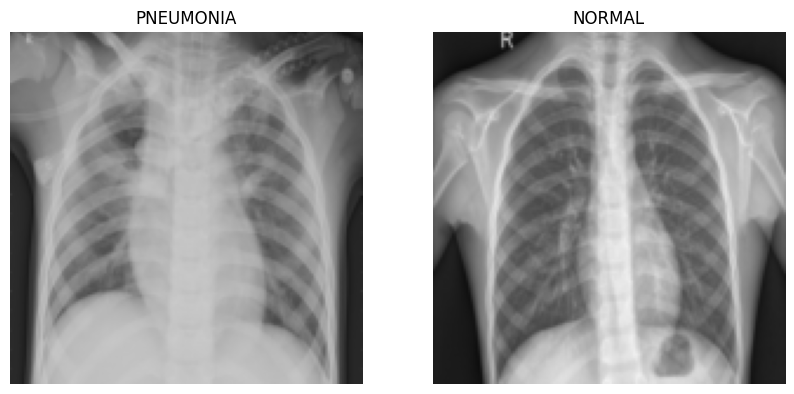

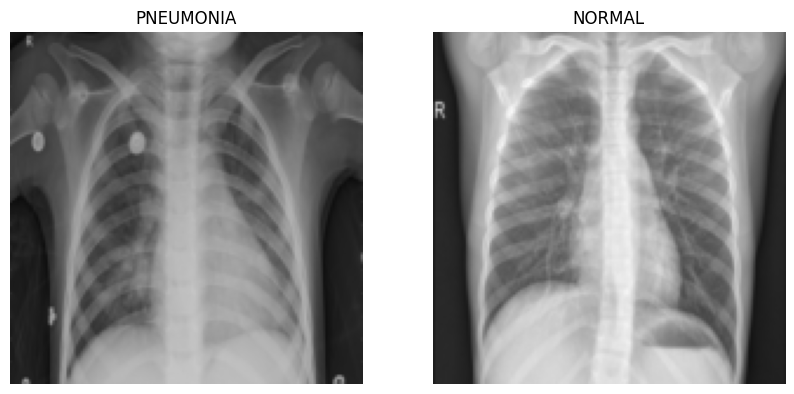

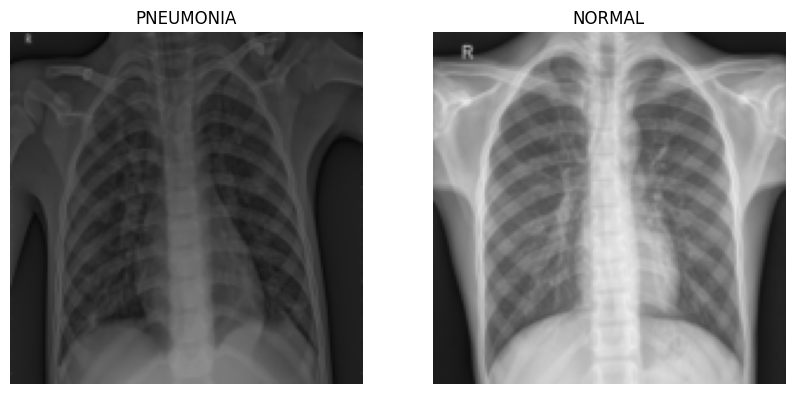

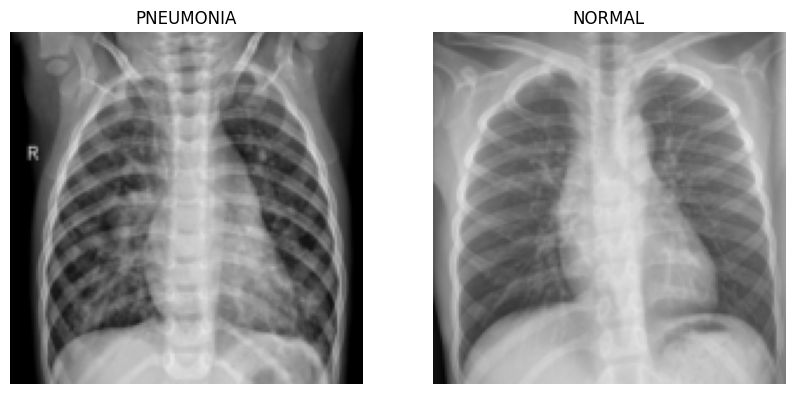

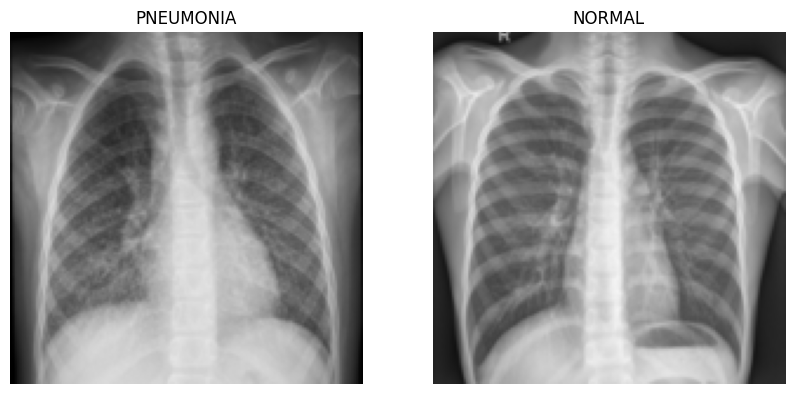

In [51]:
import matplotlib.pyplot as plt
import cv2
import os
import skimage.transform

def plotter(i):
    imagep1 = cv2.imread(os.path.join(train_dir, "PNEUMONIA", Pimages[i]))
    imagep1 = imagep1 / 255.0  # Normalize to [0, 1]
    imagep1 = skimage.transform.resize(imagep1, (150, 150, 3), mode='reflect')

    imagen1 = cv2.imread(os.path.join(train_dir, "NORMAL", Nimages[i]))
    imagen1 = imagen1 / 255.0  # Normalize to [0, 1]
    imagen1 = skimage.transform.resize(imagen1, (150, 150, 3), mode='reflect')

    plt.figure(figsize=(10, 10))

    plt.subplot(1, 2, 1)
    plt.imshow(imagep1)
    plt.title('PNEUMONIA')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(imagen1)
    plt.title('NORMAL')
    plt.axis('off')

    plt.show()

for i in range(0, 5):
    plotter(i)


In [55]:
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_acc', factor=0.1, epsilon=0.0001, patience=1, verbose=1)

In [56]:
filepath="weights.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [ ]:
! pip install keras

In [ ]:
! pip install --upgrade tensorflow

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.optimizers import SGD, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV

In [71]:
X_train=x_train.reshape(210,3,150,150)
X_test=x_test.reshape(60,3,150,150)

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Set image data format to 'channels_last'
tf.keras.backend.set_image_data_format('channels_last')

# Example of defining a simple CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(150, 150, 3)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(Conv2D(64, (3, 3), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary to verify the layer shapes
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 75, 75, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                

In [76]:
y_train_binary = np.argmax(y_train, axis=1)
y_test_binary = np.argmax(y_test, axis=1)

In [74]:
batch_size = 110
epochs = 2

In [78]:
y_train_binary = np.argmax(y_train, axis=1)
y_test_binary = np.argmax(y_test, axis=1)

In [79]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(x_train, y_train, validation_data = (x_test , y_test) ,callbacks=[lr_reduce,checkpoint] ,
          epochs=epochs)